<a href="https://colab.research.google.com/github/VictorRegueira/mlops-varr/blob/main/Entrega2/MLOps_Entrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuración del proyecto

## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [2]:
# Load the dataset
pre_df = pd.read_csv("/content/drive/MyDrive/0-Actual/MLOps-Bootcamp/ProyectoIndividual/Tetuan City power consumption.csv")

# Explore the data
pre_df.sample()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
18086,5/6/2017 14:20,21.85,58.09,0.071,843.0,52.94,34308.19672,21685.44892,18020.40486


## Renombrando las columnas

In [3]:
# Cambiar los nombres de las columnas
pre_df.rename(columns={
    'DateTime': 'date_time',
    'Temperature': 'temperature',
    'Humidity': 'humidity',
    'Wind Speed': 'wind_speed',
    'general diffuse flows': 'general_diffuse_flows',
    'diffuse flows': 'diffuse_flows',
    'Zone 1 Power Consumption': 'zone1',
    'Zone 2  Power Consumption': 'zone2',
    'Zone 3  Power Consumption': 'zone3'
}, inplace=True)

## Tipos de datos

In [4]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date_time              52416 non-null  object 
 1   temperature            52416 non-null  float64
 2   humidity               52416 non-null  float64
 3   wind_speed             52416 non-null  float64
 4   general_diffuse_flows  52416 non-null  float64
 5   diffuse_flows          52416 non-null  float64
 6   zone1                  52416 non-null  float64
 7   zone2                  52416 non-null  float64
 8   zone3                  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


Hacemos un cambio de dato a tipo fecha en vez de objto.

In [5]:
pre_df['date_time'] = pd.to_datetime(pre_df['date_time'])
# Mostrar las primeras filas del DataFrame para verificar el cambio
pre_df.head()

,date_time,temperature,humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone1,zone2,zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


## Validando datos nulos

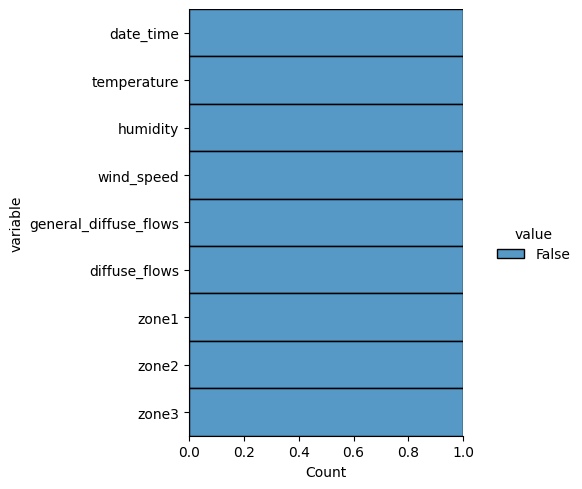

In [6]:
pre_df.isnull().melt().pipe(
    lambda pre_df: (
        sns.displot(data=pre_df, y='variable', hue='value', multiple='fill')))

No se encontraron datos nulos en el dataset proporcionado, aún así es buena prática colocar en nuestro pipeline un proceso de imputación, esto por próximos datos que podríamos ingresar.

# Análisis Exploratorio de los Datos

In [7]:
pre_df.columns

Index(['date_time', 'temperature', 'humidity', 'wind_speed',
       'general_diffuse_flows', 'diffuse_flows', 'zone1', 'zone2', 'zone3'],
      dtype='object')

## Gráficos de estacionalidad por Zona

In [8]:
pre_df_z1 =  pre_df[['date_time','zone1']]
pre_df_z1 = pre_df_z1.set_index('date_time')

pre_df_z2 =  pre_df[['date_time','zone2']]
pre_df_z2 = pre_df_z2.set_index('date_time')

pre_df_z3 =  pre_df[['date_time','zone3']]
pre_df_z3 = pre_df_z3.set_index('date_time')

In [9]:
#crear acumulado diario
count_date = pre_df_z1.groupby(pre_df_z1.index.date)['zone1'].sum()
df_z1 = pd.DataFrame(count_date)
df_z1['date_time'] = pd.to_datetime(df_z1.index)
df_z1 = df_z1.set_index('date_time')

#crear acumulado diario
count_date2 = pre_df_z2.groupby(pre_df_z2.index.date)['zone2'].sum()
df_z2 = pd.DataFrame(count_date2)
df_z2['date_time'] = pd.to_datetime(df_z2.index)
df_z2 = df_z2.set_index('date_time')

#crear acumulado diario
count_date3 = pre_df_z3.groupby(pre_df_z3.index.date)['zone3'].sum()
df_z3 = pd.DataFrame(count_date3)
df_z3['date_time'] = pd.to_datetime(df_z3.index)
df_z3 = df_z3.set_index('date_time')

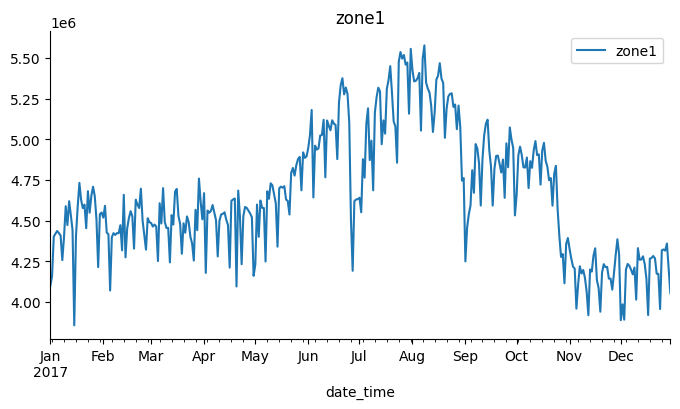

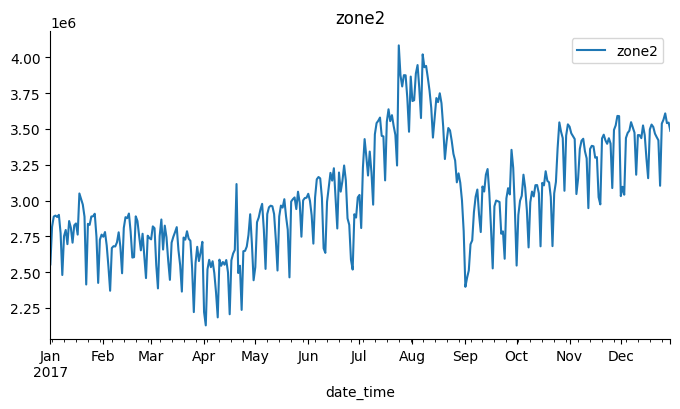

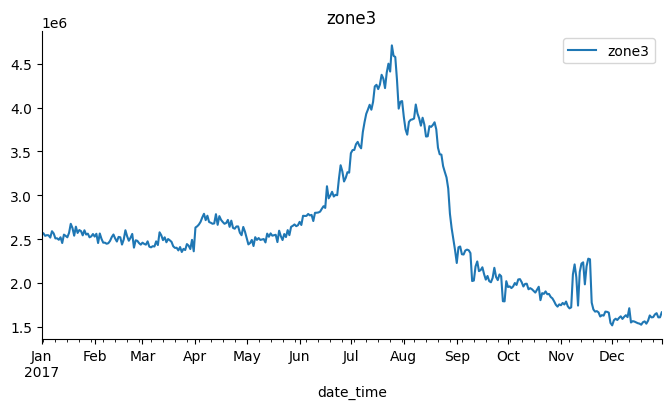

In [10]:
# Suponiendo que tienes un diccionario que contiene los DataFrames y sus títulos
dataframes = {'zone1': df_z1, 'zone2': df_z2, 'zone3': df_z3}

# Configuración común para eliminar los ejes superior y derecho
def configure_plot():
    plt.gca().spines[['top', 'right']].set_visible(False)

# Generar las visualizaciones en un solo bucle
for title, df in dataframes.items():
    df.plot(kind='line', figsize=(8, 4), title=title)
    configure_plot()

plt.show()


**Conclusiones:**
- Los meses Jun, Jul y Ago son los meses con más consumo de de enrgía eléctrica.
- Para la zona 1 y 3, los meses con menor consumo son: Nov y Dic.
- La zona 2 consumo menos energía en Apr.

## Distribución de los datos

In [11]:
pre_df.describe()

,date_time,temperature,humidity,wind_speed,general_diffuse_flows,diffuse_flows,zone1,zone2,zone3
count,52416,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,2017-07-01 23:55:00,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
min,2017-01-01 00:00:00,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,2017-04-01 23:57:30,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,2017-07-01 23:55:00,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,2017-09-30 23:52:30,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,2017-12-30 23:50:00,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360
std,NaN,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099


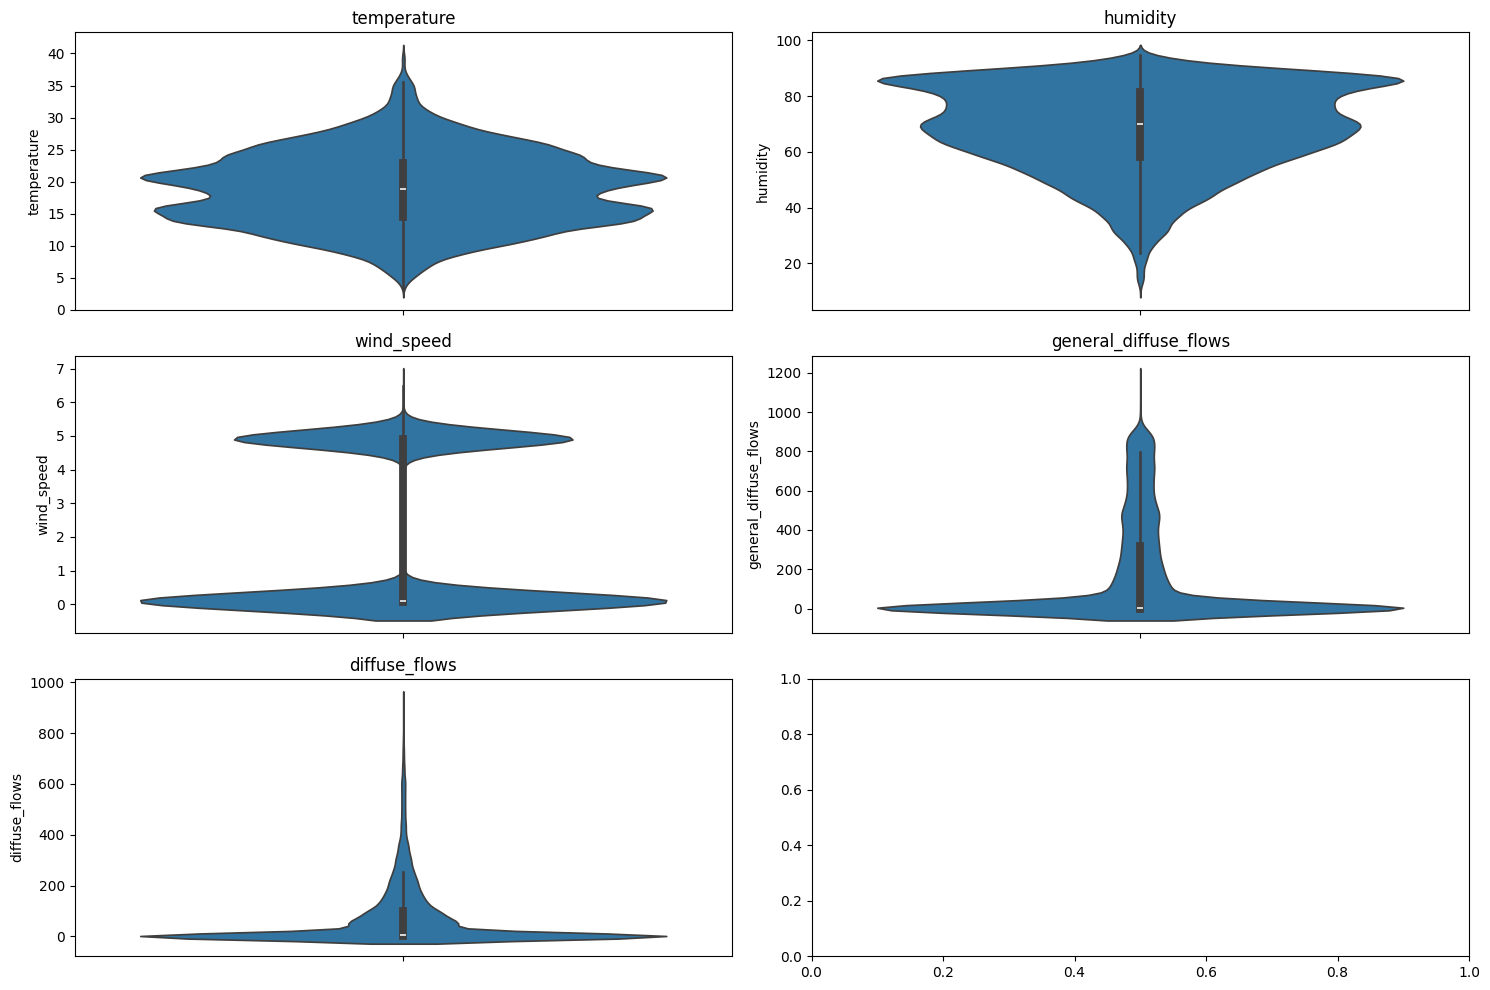

In [17]:
import matplotlib.pyplot as plt

X = pre_df[['temperature', 'humidity', 'wind_speed', 'general_diffuse_flows', 'diffuse_flows']]

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
for i, col in enumerate(X.columns):
  sns.violinplot(data=X[col], ax=axes[i // 2, i % 2])
  axes[i // 2, i % 2].set_title(col)
plt.tight_layout()
plt.show()


A través del diagrama de violín por cada feature, se interpreta lo siguiente:
- La temperatura y la humedad son los features con distribución más cercano a lo normal (Gaussiana).

- Existen un outlier muy grande en diffuse_flows

## Correlaciones entre las features y targets

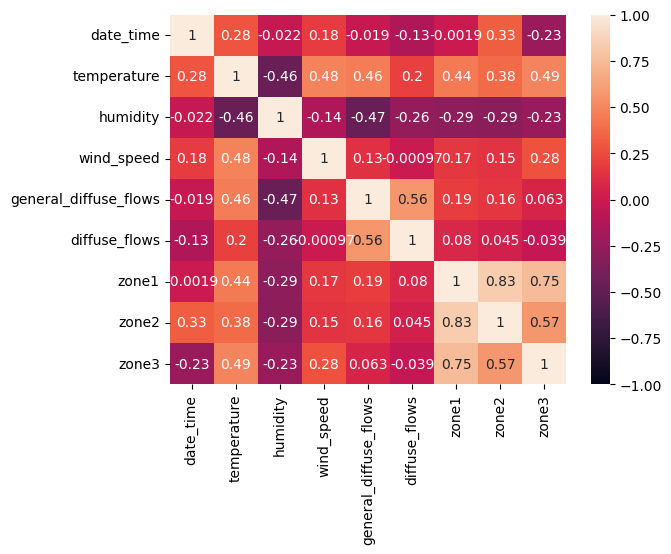

In [18]:
 # Create a heatmap of all columns in pre_df
sns.heatmap(pre_df.corr(), annot=True, vmin=-1, )
plt.show()

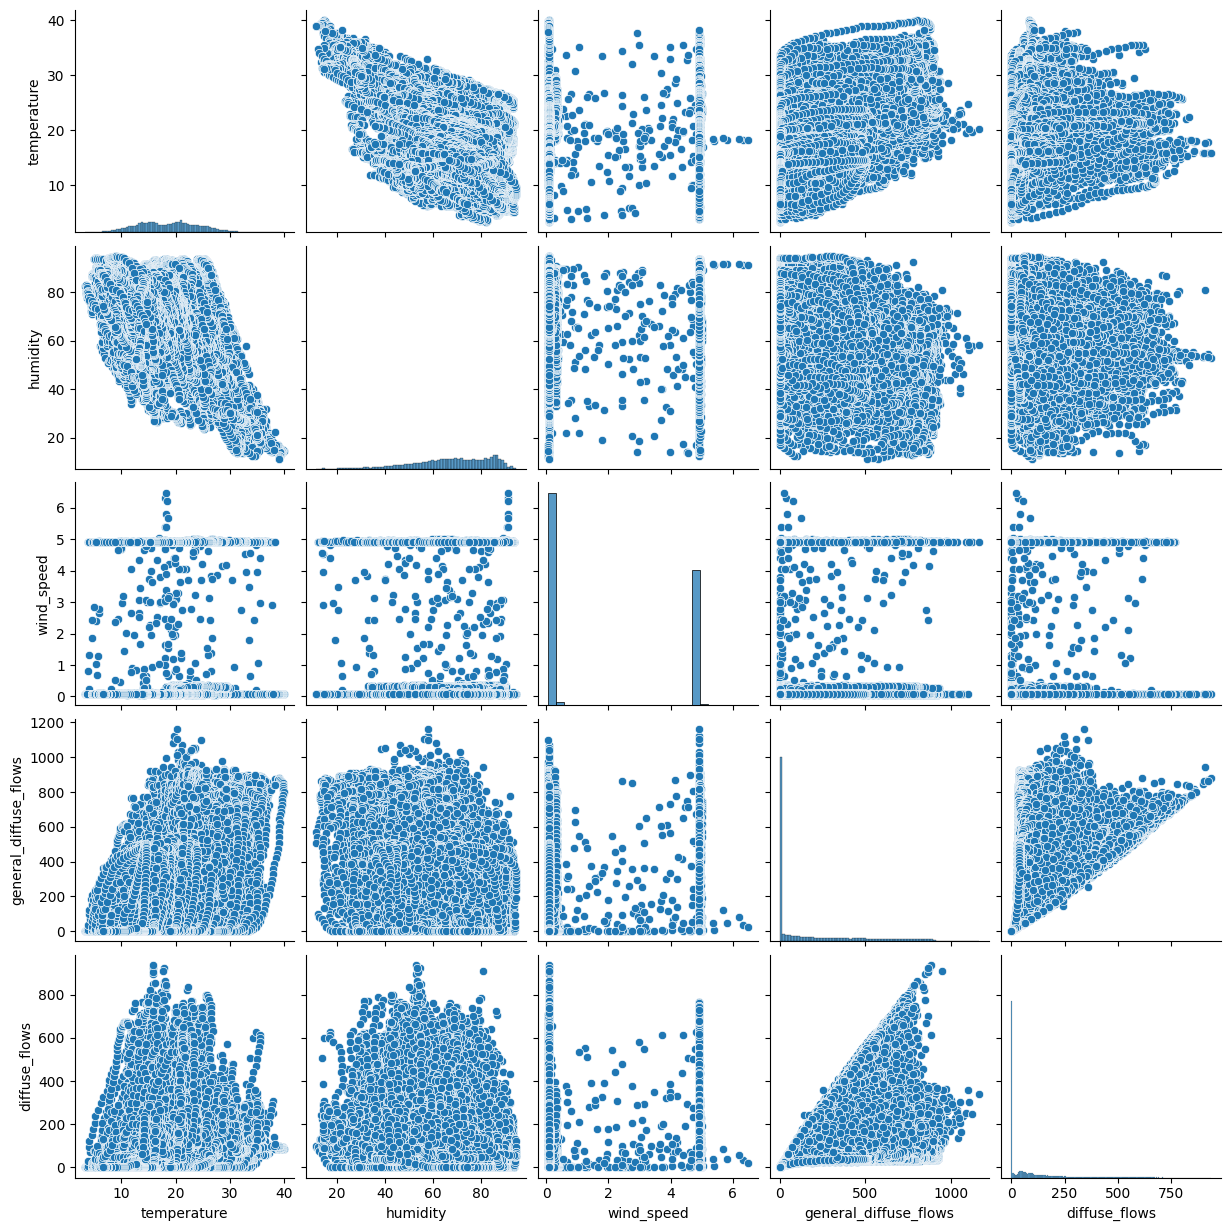

In [27]:
# Visualizar la distribución de los datos

sns.pairplot(pre_df[['temperature', 'humidity', 'wind_speed',
       'general_diffuse_flows', 'diffuse_flows']])
plt.show()

De este mapa de calor interpretamos lo siguiente:

- La variable que tiene más relación con cada uno de los targets es la temperatura y la humedad.
- La temperatura y humedad tiene una correlación negativa.

## Comportamiento de Temperatura

In [28]:

import plotly.express as px

# Create a line chart of the temperature data
fig = px.line(pre_df, x='date_time', y='temperature', title='Temperature over Time')

# Update the x-axis to display monthly values
fig.update_xaxes(
    dtick='M1',  # Set the interval between ticks to one month
    tickformat='%b',  # Set the tick format to abbreviated month names
    showgrid=False  # Remove the grid lines
)

# Update the layout to remove the legend
fig.update_layout(showlegend=False)

# Display the plot
fig.show()


Conclusiones:

- La temperatura cumple un patrón con muy similar a el que tiene el de los target de la zona 1 y 2.

In [29]:

# Calculate the average temperature for each month
monthly_avg_temp = pre_df.groupby(pre_df['date_time'].dt.month)['temperature'].mean()

# Create a bar chart of the monthly average temperature
fig = px.bar(
    monthly_avg_temp.reset_index(),
    x='date_time',
    y='temperature',
    labels={'date_time': 'Month', 'temperature': 'Average Temperature'},
    title='Average Temperature by Month'
)

# Update the x-axis to display month names
fig.update_xaxes(
    ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
)

# Remove the legend
fig.update_layout(showlegend=False)

# Display the plot
fig.show()


Conclusiones:
- Si hacemos el cálculo del promedio de temperatura por mes, observamos que definitivamente los meses con más calor son Junio, Julio y Agosto.

In [32]:
pre_df.columns

Index(['date_time', 'temperature', 'humidity', 'wind_speed',
       'general_diffuse_flows', 'diffuse_flows', 'zone1', 'zone2', 'zone3'],
      dtype='object')

# Preprocesamiento

## Separación de datos

In [40]:
from sklearn.model_selection import train_test_split

# Verificar valores faltantes
print(pre_df.isnull().sum())

# Dividir los datos en características (X) y objetivo (y)
X = pre_df[['date_time','temperature', 'humidity', 'wind_speed', 'general_diffuse_flows', 'diffuse_flows']]
y_zone1 = pre_df['zone1']
y_zone2 = pre_df['zone2']
y_zone3 = pre_df['zone3']

# Dividir los datos en conjunto de entrenamiento y prueba para cada zona
X_train_zone1, X_test_zone1, y_train_zone1, y_test_zone1 = train_test_split(X, y_zone1, test_size=0.2, random_state=42)
X_train_zone2, X_test_zone2, y_train_zone2, y_test_zone2 = train_test_split(X, y_zone2, test_size=0.2, random_state=42)
X_train_zone3, X_test_zone3, y_train_zone3, y_test_zone3 = train_test_split(X, y_zone3, test_size=0.2, random_state=42)


date_time                0
temperature              0
humidity                 0
wind_speed               0
general_diffuse_flows    0
diffuse_flows            0
zone1                    0
zone2                    0
zone3                    0
dtype: int64


### Formas de los dataFrames creados

In [41]:
# prompt: imprime el shape de cada uno de los datos de entrenamiento y prueba de las tres zonas
print("-----------Zone 1-----------")
print("X_train_zone1 shape:", X_train_zone1.shape)
print("y_train_zone1 shape:", y_train_zone1.shape)
print("X_test_zone1 shape:", X_test_zone1.shape)
print("y_test_zone1 shape:", y_test_zone1.shape)

print("\n-----------Zone 2-----------")
print("X_train_zone2 shape:", X_train_zone2.shape)
print("y_train_zone2 shape:", y_train_zone2.shape)
print("X_test_zone2 shape:", X_test_zone2.shape)
print("y_test_zone2 shape:", y_test_zone2.shape)

print("\n-----------Zone 3-----------")
print("X_train_zone3 shape:", X_train_zone3.shape)
print("y_train_zone3 shape:", y_train_zone3.shape)
print("X_test_zone3 shape:", X_test_zone3.shape)
print("y_test_zone3 shape:", y_test_zone3.shape)


-----------Zone 1-----------
X_train_zone1 shape: (41932, 6)
y_train_zone1 shape: (41932,)
X_test_zone1 shape: (10484, 6)
y_test_zone1 shape: (10484,)

-----------Zone 2-----------
X_train_zone2 shape: (41932, 6)
y_train_zone2 shape: (41932,)
X_test_zone2 shape: (10484, 6)
y_test_zone2 shape: (10484,)

-----------Zone 3-----------
X_train_zone3 shape: (41932, 6)
y_train_zone3 shape: (41932,)
X_test_zone3 shape: (10484, 6)
y_test_zone3 shape: (10484,)


## Imputación y escalamiento de datos

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer

# Definir las funciones de transformación personalizadas
def extract_date_features(X):
    # Convertir la columna de fecha y hora a tipo datetime
    X['date_time'] = pd.to_datetime(X['date_time'])
    # Extraer características de la fecha y hora
    X['year'] = X['date_time'].dt.year
    X['month'] = X['date_time'].dt.month
    X['day'] = X['date_time'].dt.day
    X['hour'] = X['date_time'].dt.hour
    X['minute'] = X['date_time'].dt.minute
    # Eliminar la columna original de fecha y hora
    X.drop(columns=['date_time'], inplace=True)
    return X

# Definir el transformador para fechas
date_transformer = Pipeline(steps=[
    ('date_extraction', FunctionTransformer(extract_date_features)),
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))  # Imputar valores faltantes (en caso de que los haya)
])

# Definir el transformador para características numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes con la media
    ('scaler', StandardScaler())  # Escalar los datos
])

# Definir las columnas por tipo de datos
datetime_cols = ['date_time']
numeric_cols = ['temperature', 'humidity', 'wind_speed', 'general_diffuse_flows', 'diffuse_flows']
target_cols = ['zone1', 'zone2', 'zone3']

# Combinar los transformadores utilizando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('date', date_transformer, datetime_cols),
        ('numeric', numeric_transformer, numeric_cols)
    ]
)


preprocessor

ColumnTransformer(transformers=[('date',
                                 Pipeline(steps=[('date_extraction',
                                                  FunctionTransformer(func=<function extract_date_features at 0x7e77117f0940>)),
                                                 ('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'))]),
                                 ['date_time']),
                                ('numeric',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['temperature', 'humidity', 'wind_speed',
                                  'general_diffuse_flows', 'diffuse_flows'])])

In [47]:
# Aplicar preprocesamiento a los datos de cada zona
X_train_zone1_preprocessed = preprocessor.fit_transform(X_train_zone1)
X_test_zone1_preprocessed = preprocessor.transform(X_test_zone1)

X_train_zone2_preprocessed = preprocessor.fit_transform(X_train_zone2)
X_test_zone2_preprocessed = preprocessor.transform(X_test_zone2)

X_train_zone3_preprocessed = preprocessor.fit_transform(X_train_zone3)
X_test_zone3_preprocessed = preprocessor.transform(X_test_zone3)

# Creación de modelo

Utilizaremos el modelo XGboost, en su versión regressor, e sun modelo muy confiable y con buenos resultados

In [53]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Definir el modelo XGBoost
xgb_model = xgb.XGBRegressor()

# Definir el pipeline con el modelo XGBoost
pipeline_xgb = Pipeline([
    ('model', xgb_model)
])

# Definir los parámetros para GridSearchCV
param_grid_xgb = {
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5],
    'model__min_child_weight': [1, 3],
    'model__subsample': [0.6, 0.8],
    'model__colsample_bytree': [0.6, 0.8],
    'model__n_estimators': [100, 200]
}

# Inicializar GridSearchCV para cada zona con el pipeline del modelo XGBoost
grid_search_xgb_zone1 = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, n_jobs=-1)
grid_search_xgb_zone2 = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, n_jobs=-1)
grid_search_xgb_zone3 = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, n_jobs=-1)

# Ajustar el modelo para cada zona
grid_search_xgb_zone1.fit(X_train_zone1_preprocessed, y_train_zone1)
grid_search_xgb_zone2.fit(X_train_zone2_preprocessed, y_train_zone2)
grid_search_xgb_zone3.fit(X_train_zone3_preprocessed, y_train_zone3)

# Obtener los mejores hiperparámetros para cada zona
best_params_xgb_zone1 = grid_search_xgb_zone1.best_params_
best_params_xgb_zone2 = grid_search_xgb_zone2.best_params_
best_params_xgb_zone3 = grid_search_xgb_zone3.best_params_

print("Mejores hiperparámetros para la zona 1 con XGBoost:", best_params_xgb_zone1)
print("Mejores hiperparámetros para la zona 2 con XGBoost:", best_params_xgb_zone2)
print("Mejores hiperparámetros para la zona 3 con XGBoost:", best_params_xgb_zone3)


Mejores hiperparámetros para la zona 1 con XGBoost: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__min_child_weight': 3, 'model__n_estimators': 200, 'model__subsample': 0.8}
Mejores hiperparámetros para la zona 2 con XGBoost: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__min_child_weight': 1, 'model__n_estimators': 200, 'model__subsample': 0.6}
Mejores hiperparámetros para la zona 3 con XGBoost: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__min_child_weight': 1, 'model__n_estimators': 200, 'model__subsample': 0.8}


## Curvas de aprendizaje

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Función para generar una curva de aprendizaje.

    Parameters:
    estimator : Objeto estimador
        El estimador utilizado para predecir en cada punto de la curva de aprendizaje.
    title : str
        Título del gráfico.
    X : array-like, shape (n_samples, n_features)
        Datos de entrenamiento.
    y : array-like, shape (n_samples) or (n_samples, n_features)
        Etiquetas verdaderas.
    ylim : tuple, shape (ymin, ymax), optional
        Rango de la gráfica en el eje y.
    cv : int, cross-validation generator or an iterable, optional
        Estrategia de cross-validation. None utiliza StratifiedKFold.
    n_jobs : int or None, optional
        Número de trabajos a ejecutar en paralelo.
    train_sizes : array-like, shape (n_ticks,), optional
        Tamaños de los conjuntos de entrenamiento a utilizar.

    Returns:
    plt : objeto matplotlib.pyplot
        La gráfica de curva de aprendizaje.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

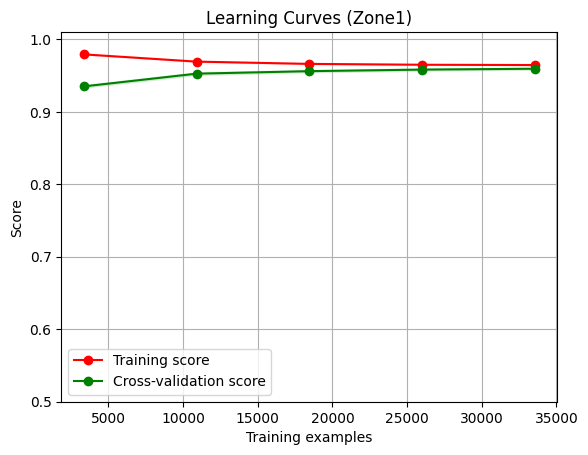

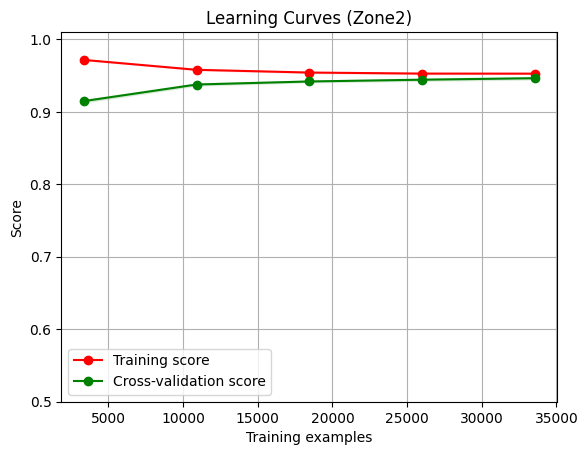

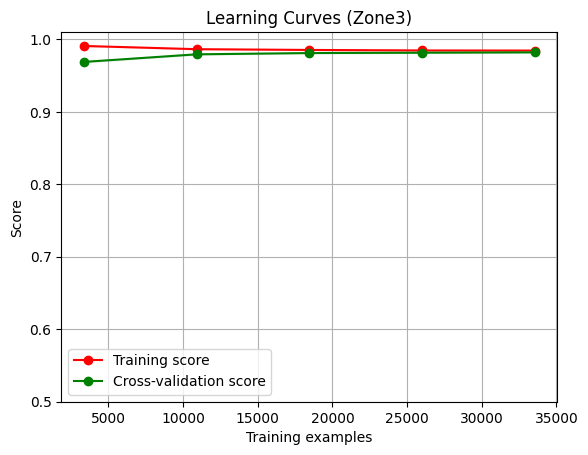

In [55]:
# Definir los títulos para cada modelo
title_zone1 = "Learning Curves (Zone1)"
title_zone2 = "Learning Curves (Zone2)"
title_zone3 = "Learning Curves (Zone3)"

# Establecer el tamaño del conjunto de entrenamiento y el número de cross-validation splits
cv = 5

# Crear las curvas de aprendizaje para cada modelo
plot_learning_curve(grid_search_xgb_zone1.best_estimator_, title_zone1, X_train_zone1_preprocessed, y_train_zone1, ylim=(0.5, 1.01), cv=cv, n_jobs=-1)
plot_learning_curve(grid_search_xgb_zone2.best_estimator_, title_zone2, X_train_zone2_preprocessed, y_train_zone2, ylim=(0.5, 1.01), cv=cv, n_jobs=-1)
plot_learning_curve(grid_search_xgb_zone3.best_estimator_, title_zone3, X_train_zone3_preprocessed, y_train_zone3, ylim=(0.5, 1.01), cv=cv, n_jobs=-1)

plt.show()


## Resultados del modelo

---



In [75]:
def preprocess_data(X, y):
    # Extract month from datetime
    X['month'] = X['date_time'].dt.month
    grouped_data = pd.concat([X, y], axis=1).groupby('month').mean().reset_index()
    return grouped_data.drop(columns=['date_time'])

def train_model(X_train, y_train, best_params):
    xgb_model = xgb.XGBRegressor(**best_params)
    pipeline = Pipeline([
        ('model', xgb_model)
    ])
    pipeline.fit(X_train, y_train)
    return pipeline

def predict_model(model, X_test):
    return model.predict(X_test)

def plot_forecasting(df, title, target_column):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='month', y=target_column, label='Real', marker='o')
    sns.lineplot(data=df, x='month', y='Predicción', label='Predicción', linestyle='--', marker='o')
    plt.title(title)
    plt.xlabel('Mes')
    plt.ylabel('Consumo eléctrico')
    plt.xticks(np.arange(1, 13))
    plt.legend()
    plt.show()



### Zona 1

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[04:53:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "model__colsample_bytree", "model__learning_rate", "model__max_depth", "model__min_child_weight", "model__n_estimators", "model__subsample" } are not used.




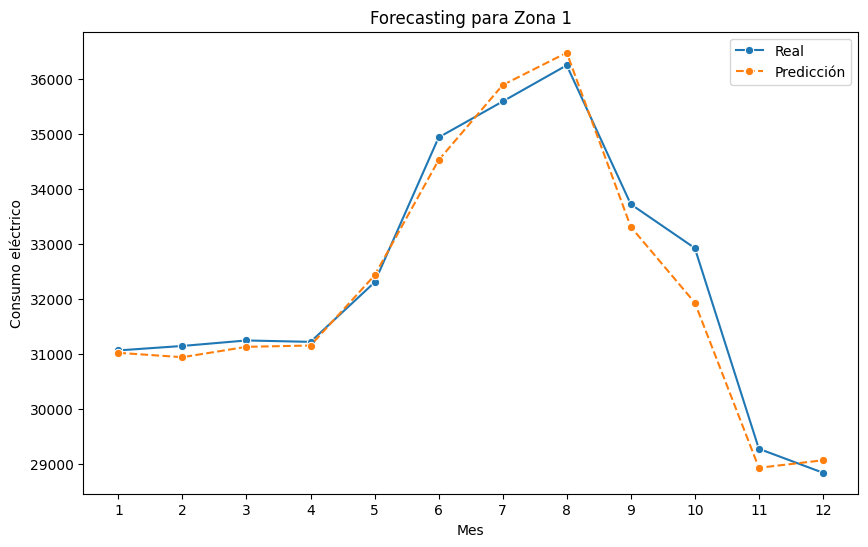

In [76]:
# Preprocesamiento de datos para Zona 1
grouped_data_zone1 = preprocess_data(X_train_zone1, y_train_zone1)

# Entrenamiento del modelo para Zona 1
model_zone1 = train_model(grouped_data_zone1.drop(columns=['zone1']), grouped_data_zone1['zone1'], best_params_xgb_zone1)

# Predicción para Zona 1
y_pred_zone1 = predict_model(model_zone1, preprocess_data(X_test_zone1, y_test_zone1).drop(columns=['zone1']))

# Creación del DataFrame para Zona 1
df_zone1 = preprocess_data(X_test_zone1, y_test_zone1)
df_zone1['Predicción'] = y_pred_zone1

# Gráfico para Zona 1
plot_forecasting(df_zone1, 'Forecasting para Zona 1', 'zone1')


### Zona 2

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[04:54:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "model__colsample_bytree", "model__learning_rate", "model__max_depth", "model__min_child_weight", "model__n_estimators", "model__subsample" } are not used.




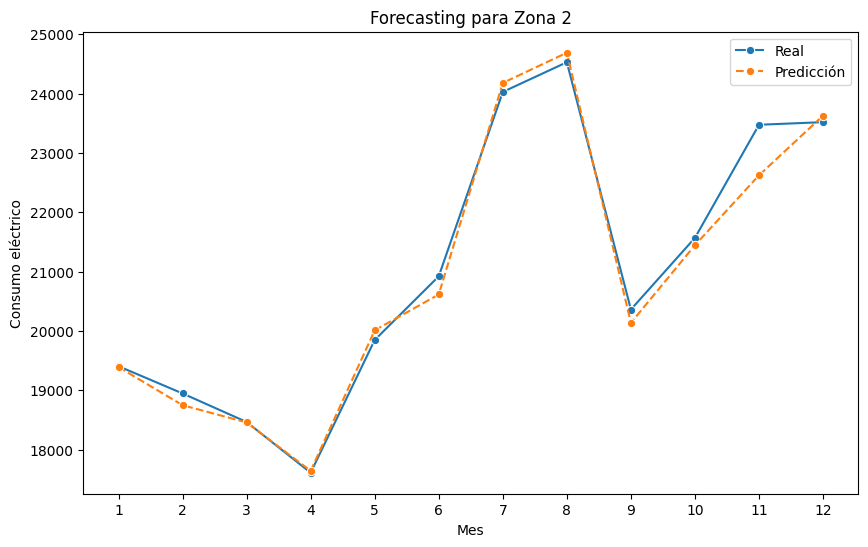

In [77]:
# Preprocesamiento de datos para Zona 2
grouped_data_zone2 = preprocess_data(X_train_zone2, y_train_zone2)

# Entrenamiento del modelo para Zona 2
model_zone2 = train_model(grouped_data_zone2.drop(columns=['zone2']), grouped_data_zone2['zone2'], best_params_xgb_zone2)

# Predicción para Zona 2
y_pred_zone2 = predict_model(model_zone2, preprocess_data(X_test_zone2, y_test_zone2).drop(columns=['zone2']))

# Creación del DataFrame para Zona 2
df_zone2 = preprocess_data(X_test_zone2, y_test_zone2)
df_zone2['Predicción'] = y_pred_zone2

# Gráfico para Zona 2
plot_forecasting(df_zone2, 'Forecasting para Zona 2', 'zone2')


### Zona 3

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[04:54:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "model__colsample_bytree", "model__learning_rate", "model__max_depth", "model__min_child_weight", "model__n_estimators", "model__subsample" } are not used.




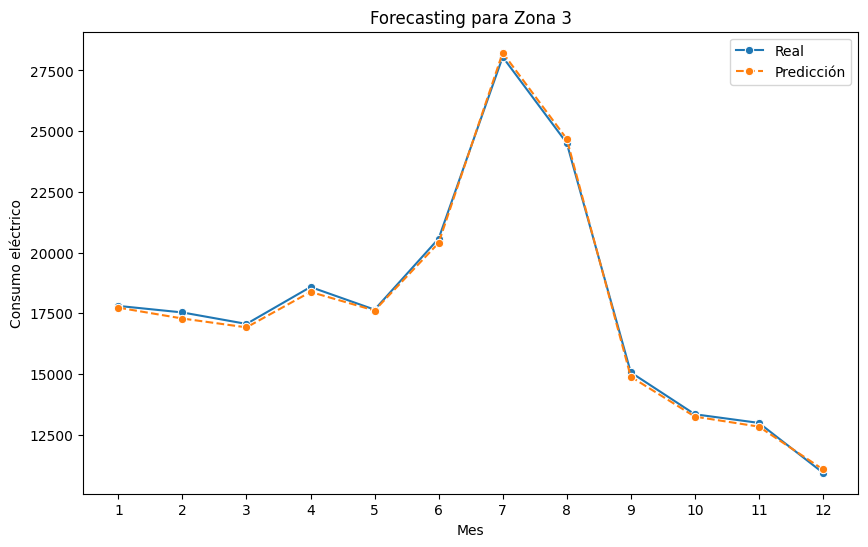

In [78]:
# Preprocesamiento de datos para Zona 3
grouped_data_zone3 = preprocess_data(X_train_zone3, y_train_zone3)

# Entrenamiento del modelo para Zona 3
model_zone3 = train_model(grouped_data_zone3.drop(columns=['zone3']), grouped_data_zone3['zone3'], best_params_xgb_zone3)

# Predicción para Zona 3
y_pred_zone3 = predict_model(model_zone3, preprocess_data(X_test_zone3, y_test_zone3).drop(columns=['zone3']))

# Creación del DataFrame para Zona 3
df_zone3 = preprocess_data(X_test_zone3, y_test_zone3)
df_zone3['Predicción'] = y_pred_zone3

# Gráfico para Zona 3
plot_forecasting(df_zone3, 'Forecasting para Zona 3', 'zone3')


## Mejoras del modelo

Podmeos tomar en cuenta más métricas para asignar los hiperparámetros del modelo.

Métricas de regresión:

    Error cuadrático medio (MSE): La media de los errores al cuadrado.
    Error cuadrático medio negativo (neg_mean_squared_error): El opuesto del MSE, para que valores más altos sean mejores.
    Error absoluto medio (MAE): La media de los valores absolutos de los errores.
    R-cuadrado (R^2): La proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes.
    Raíz del error cuadrático medio (RMSE): La raíz cuadrada del MSE.

## Considerar hacer predicciones a futuro y graficarlo.